In [62]:
# Eric Lin, Anna Wang, Max Bobby

In [107]:
import json
import pandas as pd
from sklearn import neighbors, datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import numpy as np

In [108]:
n_neighbors = 15

In [109]:
# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
print(X)

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/anaconda3/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

In [110]:
f_test = open("Homework test data.txt", "r")
print(f_test.read())
i = 0
for line in f_test.readlines():
    i += 1
print(i)

4.0 2390
3.76 2300
3.92 2250
3.95 2200
3.88 2350
3.7 2300
3.98 2100
3.86 2120
3.95 2350
3.75 2220
0


In [111]:
# Loading in Training Set
training_data = []      # 2-D list
training_target = []    # 1-D list
with open('Homework training data.txt') as fp:
    for line in iter(fp.readline, ''):
        parsed_line = line.strip().split(' ')
        training_target.append(parsed_line[0])
        training_data.append(parsed_line[1:])


In [112]:
# Fitting with KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(training_data, training_target)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [113]:
# Loading in Testing Set
testing_data = []      # 2-D list
with open('Homework test data.txt') as fp:
    for line in iter(fp.readline, ''):
        parsed_line = line.strip().split(' ')
        testing_data.append(parsed_line)
print(testing_data)

[['4.0', '2390'], ['3.76', '2300'], ['3.92', '2250'], ['3.95', '2200'], ['3.88', '2350'], ['3.7', '2300'], ['3.98', '2100'], ['3.86', '2120'], ['3.95', '2350'], ['3.75', '2220']]


In [114]:
# Predicting Scores with the test data
college_results = neigh.predict(testing_data)
print(college_results)
print("-----Classification Results-----")
print("College  \t GPA \t SAT")
print("--------------------------------")
for i in range(college_results.size):
    print(college_results[i], end = "       \t")
    print(testing_data[i][0], end = "\t")
    print(testing_data[i][1])

['MIT' 'Caltech' 'Caltech' 'Caltech' 'MIT' 'Caltech' 'Stanford' 'Stanford'
 'MIT' 'Caltech']
-----Classification Results-----
College  	 GPA 	 SAT
--------------------------------
MIT       	4.0	2390
Caltech       	3.76	2300
Caltech       	3.92	2250
Caltech       	3.95	2200
MIT       	3.88	2350
Caltech       	3.7	2300
Stanford       	3.98	2100
Stanford       	3.86	2120
MIT       	3.95	2350
Caltech       	3.75	2220


[4.0, 3.76, 3.92, 3.95, 3.88, 3.7, 3.98, 3.86, 3.95, 3.75]
[2390, 2300, 2250, 2200, 2350, 2300, 2100, 2120, 2350, 2220]


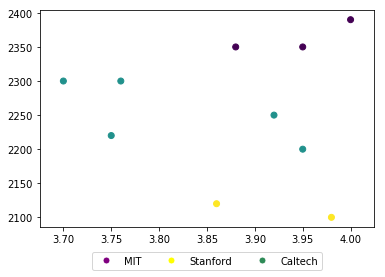

In [142]:
# Reverse the order
gpa_list = []
sat_list = []

for i in range(len(testing_data)):
    gpa_list.append(float(testing_data[i][0]))
    sat_list.append(int(testing_data[i][1]))
print(gpa_list)
print(sat_list)

college_results_colors = []
for i in range(len(college_results)):
    if college_results[i] == 'MIT':
        college_results_colors.append(1)
    elif college_results[i] == 'Caltech':
        college_results_colors.append(2)
    else:
        college_results_colors.append(3)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='MIT',
                          markerfacecolor='purple', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Stanford',
                          markerfacecolor='yellow', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Caltech',
                          markerfacecolor='seagreen', markersize=7)]
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol = 3)


# Graphing
plt.scatter(gpa_list, sat_list, c = college_results_colors)
plt.show()